### Step1: Load Libraries and Data

In [123]:
# Import required data modules
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()

In [124]:
# load_boston gives you the dictionary and print the keys of that dictionary
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [125]:
#Understand the features of the data.
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [126]:
# Create a dataframe bos_df
bos_df = pd.DataFrame(boston.data,columns=boston.feature_names)

In [127]:
# The prices of the house indicated by the variable MEDV is our target variable
# and the remaining are the feature variables based on which we will predict the value of a house
bos_df['Price'] = boston.target

In [128]:
# print the dataframe
bos_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [129]:
bos_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Step 2 : Exploratory Data Analysis

In [130]:
# check for null values
bos_df2=pd.get_dummies(bos_df,drop_first=True,columns=['CHAS']).rename({'CHAS_1.0':'River Bound'},axis=1)

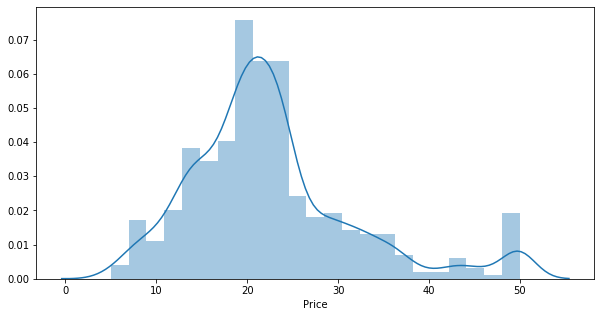

In [131]:
# use some visualizations to understand the relationship of the target variable with other features
# first plot the distribution of the target variable using seaborn
plt.figure(figsize=(10,5))
sns.distplot(bos_df['Price'])
plt.show()

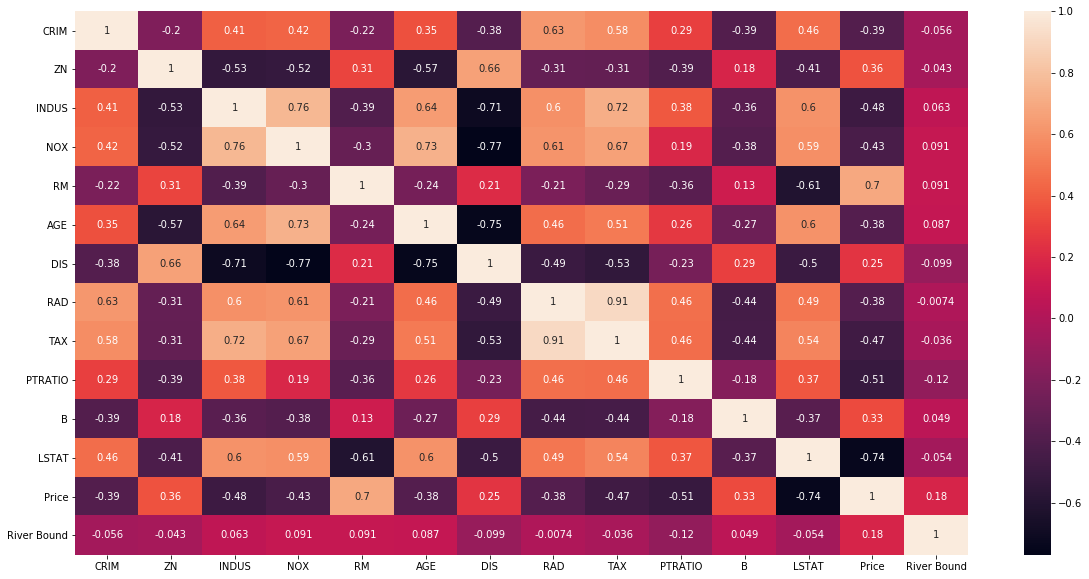

In [132]:
plt.figure(figsize=(20,10))
sns.heatmap(bos_df2.corr(),annot=True)

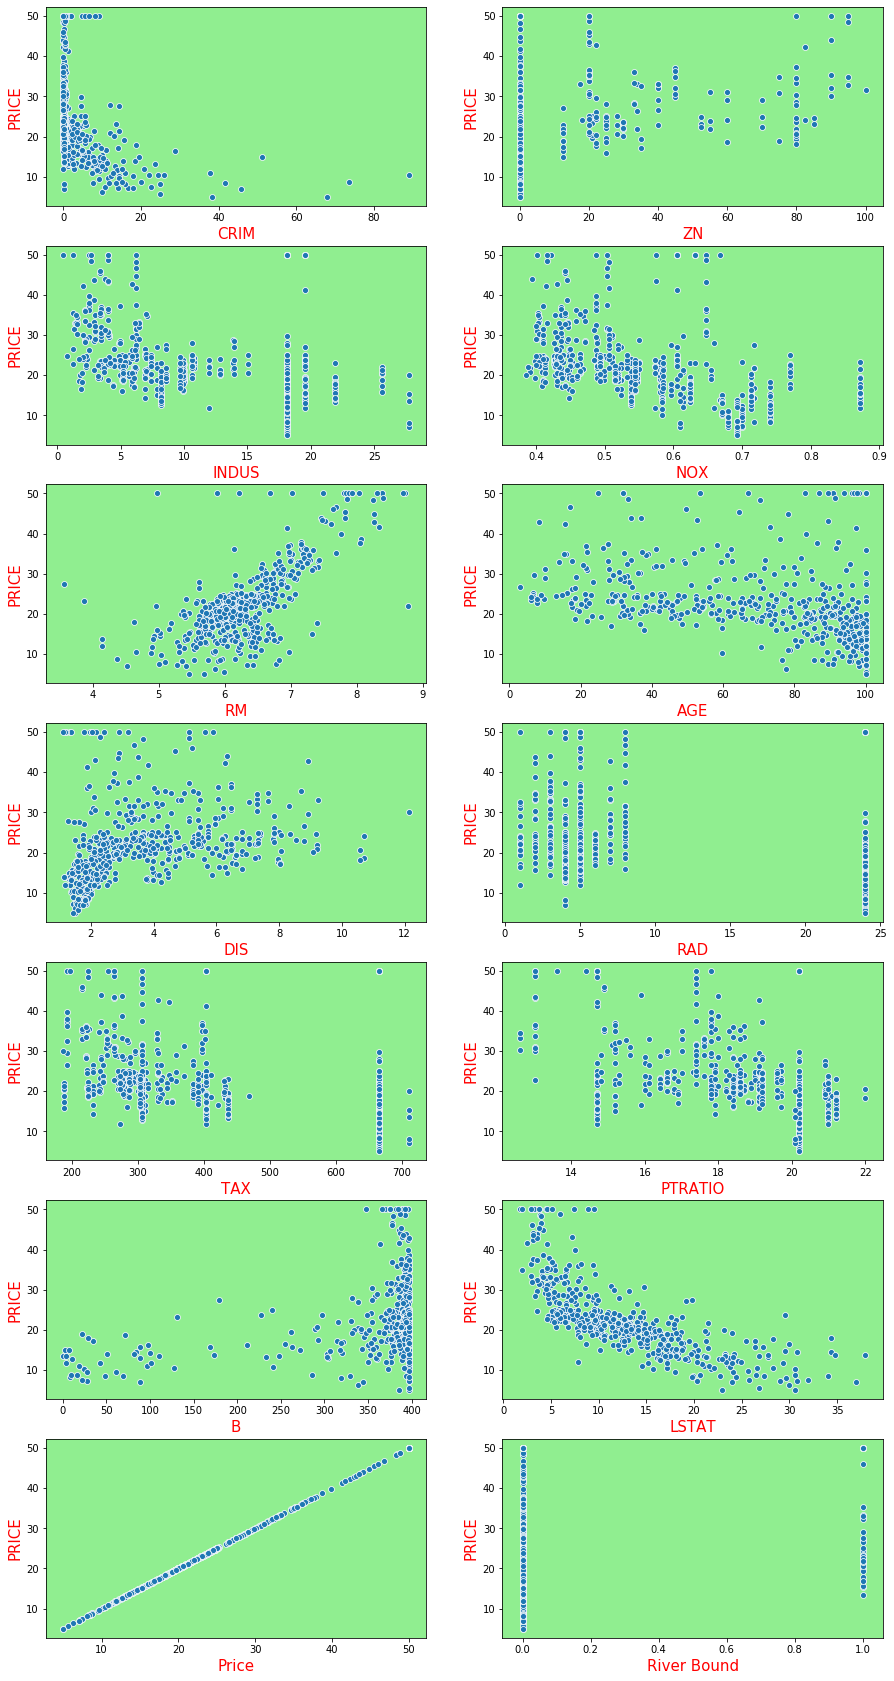

In [133]:
fig=plt.figure(figsize=(15,30))
for i,j in enumerate(bos_df2.columns): 
    ax=fig.add_subplot(7,2,i+1)
    sns.scatterplot(j,'Price',data=bos_df2)
    ax.set_xlabel(j,fontsize=15,color='red')
    ax.set_ylabel('PRICE',fontsize=15,color='red')
    ax.set(facecolor='lightgreen')


### Outlier Prediction

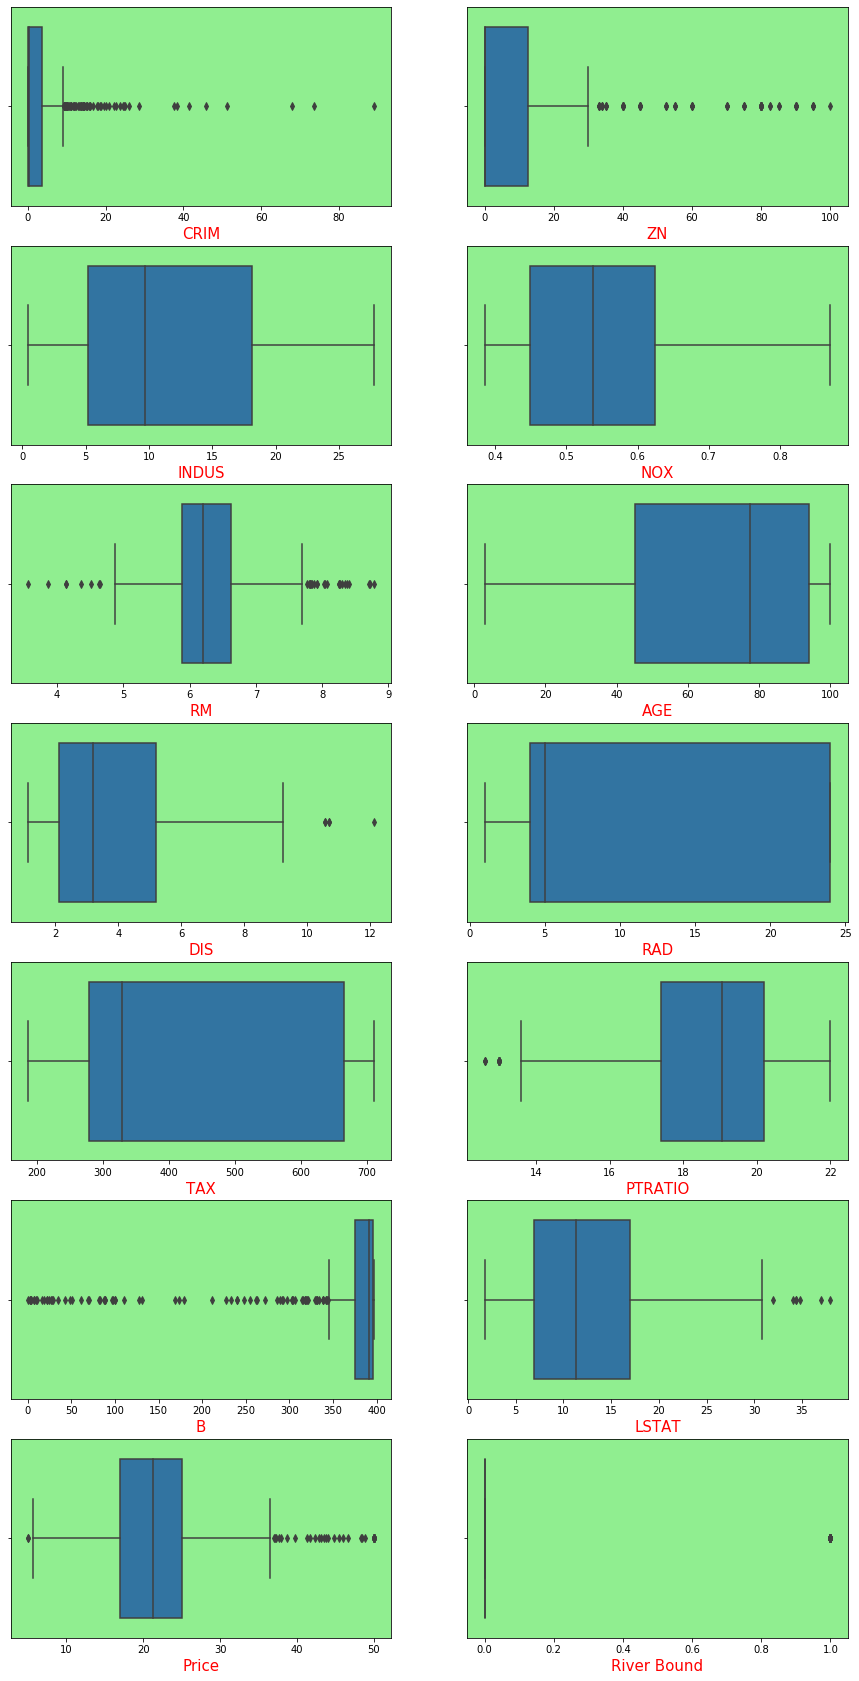

In [134]:
fig=plt.figure(figsize=(15,30))
for i,j in enumerate(bos_df2.columns): 
    ax=fig.add_subplot(7,2,i+1)
    sns.boxplot(x=j,data=bos_df2)
    ax.set_xlabel(j,fontsize=15,color='red')
    ax.set(facecolor='lightgreen')

### Outlier Removal

In [135]:
from scipy import stats
z=np.abs(stats.zscore(bos_df2))
z

array([[0.41978194, 0.28482986, 1.2879095 , ..., 1.0755623 , 0.15968566,
        0.27259857],
       [0.41733926, 0.48772236, 0.59338101, ..., 0.49243937, 0.10152429,
        0.27259857],
       [0.41734159, 0.48772236, 0.59338101, ..., 1.2087274 , 1.32424667,
        0.27259857],
       ...,
       [0.41344658, 0.48772236, 0.11573841, ..., 0.98304761, 0.14880191,
        0.27259857],
       [0.40776407, 0.48772236, 0.11573841, ..., 0.86530163, 0.0579893 ,
        0.27259857],
       [0.41500016, 0.48772236, 0.11573841, ..., 0.66905833, 1.15724782,
        0.27259857]])

In [136]:
bos_df2.iloc[]

SyntaxError: invalid syntax (<ipython-input-136-1977fbf23aaf>, line 1)

In [137]:
boston_df_o = bos_df2.iloc[(z < 3).all(axis=1)]

In [138]:
boston_df_o

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price,River Bound
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,0


### Step 3 : Model Creation

In [139]:
x=boston_df_o.drop('Price',axis=1)
y=boston_df_o['Price']

In [140]:
boston_df_o.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price,River Bound
count,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.0
mean,2.452461,9.602410,10.829687,0.547168,6.267554,67.384337,3.852640,8.684337,393.853012,18.467952,374.235373,12.275976,22.353976,0.0
std,4.897241,19.677404,6.798613,0.110428,0.611602,28.072043,1.964763,8.196802,161.196133,2.137611,51.582784,6.474602,8.077366,0.0
min,0.006320,0.000000,0.460000,0.385000,4.368000,2.900000,1.169100,1.000000,188.000000,12.600000,83.450000,1.730000,5.600000,0.0
25%,0.081005,0.000000,5.130000,0.449000,5.886000,43.550000,2.203200,4.000000,279.000000,17.400000,377.880000,7.210000,17.550000,0.0
50%,0.211610,0.000000,8.560000,0.524000,6.193000,73.900000,3.377900,5.000000,315.000000,19.000000,392.630000,11.220000,21.200000,0.0
75%,2.152115,12.500000,18.100000,0.609000,6.559500,93.700000,5.287300,8.000000,437.000000,20.200000,396.900000,16.215000,24.800000,0.0
max,28.655800,80.000000,27.740000,0.871000,8.337000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,31.990000,50.000000,0.0


In [141]:
import seaborn as sns

In [142]:
# data  splitting into Train and Test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [143]:
from sklearn.preprocessing import StandardScaler

In [144]:
scaler=StandardScaler()
x_std_train=scaler.fit_transform(x_train)
x_std_test=scaler.transform(x_test)

In [145]:
x_std_train.shape

(332, 13)

In [146]:
x_std_test.shape

(83, 13)

In [147]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_std_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Step 4 : Model Prediction

In [148]:
y_train_predict=regressor.predict(x_std_train)
y_test_predict=regressor.predict(x_std_test)

In [149]:
y_test_predict

array([21.57232667, 17.6362508 , 31.85666169, 20.15756668, 17.55556597,
       21.62694593, 15.44994397, 26.40717013, 30.93242501, 12.29913087,
       20.20812143, 12.82083376, 16.4808748 , 24.57449855, 28.14151115,
        9.35672713, 27.65936406, 27.75315863, 24.75400459, 18.5530135 ,
       20.99403702, 19.11903542, 24.31503995, 11.50017769, 22.89552437,
       22.50642045, 34.15908636, 28.27226729, 25.60910234, 24.64451781,
       31.59901463, 11.81482421, 12.3755016 , 25.04030607, 15.837895  ,
       14.19625565, 25.94799649, 22.93616312, 16.02813229, 19.32213031,
       17.33687589, 19.38384046, 21.47870187, 29.85328776, 18.1399087 ,
       28.59176675, 19.54363538, 20.17186346, 20.11096075, 24.18397546,
       22.34838736, 22.21694566, 37.33389995, 13.78748433, 19.61158411,
       22.94659441, 18.47746185, 39.0259803 , 22.18167987, 19.01394126,
       26.30013722, 20.01920153, 25.37087482, 28.59851918, 11.03073401,
        2.78793965, 32.73238086, 20.0483118 , 16.17685098, 20.87

### Step 5 : Model Evaluation

In [150]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
k = x_test.shape[1]
n = len(x_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_test_predict))
MSE = mean_squared_error(y_test, y_test_predict)
MAE = mean_absolute_error(y_test, y_test_predict)
r2 = r2_score(y_test, y_test_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
MAPE = np.mean( np.abs((y_test - y_test_predict) /y_test ) ) * 100

print(f'RMSE ={RMSE:0.2f} \nMSE ={MSE:0.2f} \nMAE ={MAE:0.2f} \nR2 ={r2:0.2f} \nAdjusted R2 ={adj_r2:0.2f} \nMean Absolute Percentage Error ={MAPE:0.2f}') 



RMSE =3.26 
MSE =10.62 
MAE =2.49 
R2 =0.78 
Adjusted R2 =0.73 
Mean Absolute Percentage Error =13.00


[None]

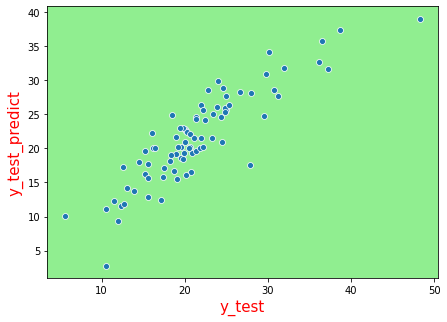

In [151]:
fig2=plt.figure(figsize=(7,5))
ax2=fig2.add_subplot(1,1,1)
sns.scatterplot(y_test,y_test_predict)
ax2.set_xlabel('y_test',fontsize=15,color='red')
ax2.set_ylabel('y_test_predict',fontsize=15,color='red')
ax2.set(facecolor='lightgreen')
